<a href="https://colab.research.google.com/github/ffffuryo/ffffuryo.github.io/blob/main/%E3%82%A2%E3%83%99%E3%83%AC%E3%83%BC%E3%82%B8%E3%83%92%E3%83%83%E3%82%BF%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 作業フォルダへの移動を行います。
# 人によって作業場所がことなるので、その場合作業場所を変更してください。
import os 
os.chdir('/content/drive/MyDrive/データ解析/野球お試し') #ここを変更。

In [ ]:
import pandas as pd
import numpy as np
import numpy.random as random
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt

In [ ]:
TB_data=pd.read_csv("TB_data.csv",index_col=(["launch_angle"]))
#打撃結果、打球位置（HRは0）、打球の種類、打球角度、打球角度を抽出
TB_data=TB_data[["events","hit_location","bb_type","launch_speed"]].fillna(0)
TB_data

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-259-52ce19ad2dc1>", line 1, in <cell line: 1>
    TB_data=pd.read_csv("TB_data.csv",index_col=(["launch_angle"]))
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    se

In [ ]:
TB_low_hit=TB_data[TB_data["bb_type"].isin(["line_drive","ground_ball"])]

TB_low_hit



,events,hit_location,bb_type,launch_speed
launch_angle,,,,
-4.0,single,7.0,ground_ball,100.5
-15.0,field_out,4.0,ground_ball,69.0
21.0,field_out,8.0,line_drive,105.8
-24.0,field_out,5.0,ground_ball,89.1
-5.0,field_out,3.0,ground_ball,98.9
...,...,...,...,...
15.0,field_out,7.0,line_drive,114.0
-13.0,field_out,5.0,ground_ball,92.6
3.0,single,9.0,ground_ball,83.2


In [ ]:
TB_low_hit=TB_low_hit.replace({"hit_location":{
    0.0:'home_run',
    1.0:'in_fielder',
    2.0:'in_fielder',
    3.0:'in_fielder',
    4.0:'in_fielder',
    5.0:'in_fielder',
    6.0:'in_fielder',
    7.0:'out_fielder',
    8.0:'out_fielder',
    9.0:'out_fielder'
    }})
TB_low_hit

,events,hit_location,bb_type,launch_speed
launch_angle,,,,
-4.0,single,out_fielder,ground_ball,100.5
-15.0,field_out,in_fielder,ground_ball,69.0
21.0,field_out,out_fielder,line_drive,105.8
-24.0,field_out,in_fielder,ground_ball,89.1
-5.0,field_out,in_fielder,ground_ball,98.9
...,...,...,...,...
15.0,field_out,out_fielder,line_drive,114.0
-13.0,field_out,in_fielder,ground_ball,92.6
3.0,single,out_fielder,ground_ball,83.2


In [ ]:
TB_low_hit=TB_low_hit.groupby(["launch_angle","events"]).size().unstack().fillna(0)
TB_low_hit

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-256-723f5992e34a>", line 1, in <cell line: 1>
    TB_low_hit=TB_low_hit.groupby(["launch_angle","events"]).size().unstack().fillna(0)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py", line 8402, in groupby
    return DataFrameGroupBy(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/groupby.py", line 965, in __init__
    grouper, exclusions, obj = get_grouper(
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/groupby/grouper.py", line 888, in get_grouper
    raise KeyError(gpr)
KeyError: 'events'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = valu

In [ ]:
TB_low_hit=TB_low_hit.reindex(columns=["home_run","triple","double","single","field_out"])
TB_low_hit

events,home_run,triple,double,single,field_out
launch_angle,,,,,
-84.0,0.0,0.0,0.0,1.0,0.0
-79.0,0.0,0.0,0.0,1.0,0.0
-75.0,0.0,0.0,0.0,0.0,2.0
-73.0,0.0,0.0,0.0,0.0,2.0
-70.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...
27.0,0.0,0.0,2.0,0.0,3.0
28.0,0.0,0.0,0.0,0.0,2.0
29.0,0.0,0.0,0.0,0.0,2.0


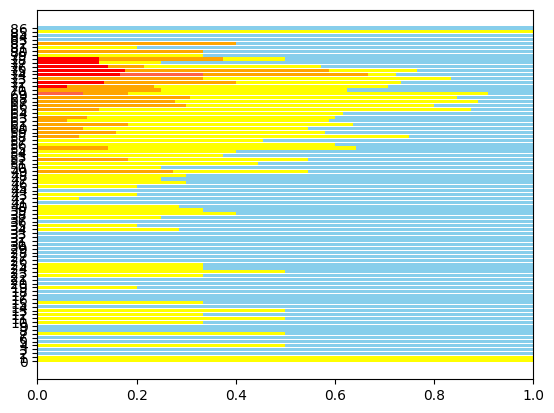

In [ ]:
df = TB_low_hit

# 正規化する
df = df.div(df.sum(axis=1), axis=0)

n_rows, n_cols = df.shape
positions = np.arange(n_rows)
offsets = np.zeros(n_rows, dtype=df.values.dtype)
colors = plt.get_cmap("tab20c")(np.linspace(0, 1, n_cols))

fig, ax = plt.subplots()
ax.set_yticks(positions)
colorlist = ["r", "tomato","orange","yellow","skyblue"]

for i in range(len(df.columns)):
    # 棒グラフを描画する。
    bar = ax.barh(positions, df.iloc[:, i], left=offsets, color=colorlist[i])
    offsets += df.iloc[:, i]



    # 棒グラフのラベルを描画する。
##      for rect in bar:
#        cx = rect.get_x() + rect.get_width() / 2
#        cy = rect.get_y() + rect.get_height() / 2
#        ax.text(cx, cy, df.columns[i], color="k", ha="center", va="center")